In [1]:
import os 
os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import state_base, params_base, vesting_schedule_translate

ms = load_from_json(deepcopy(math_spec_json))
msi = ms.build_implementation(params_base)

Placeholder has no control action options
Controller Update Control Action has no control action options
No python implementation for Controller Update Policy / Linear Controller Policy. To fix this, go to Implementations/Python/Policies and add Linear Controller Policy
No python implementation for Increment Block Number Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Increment Block Number Mechanism
No python implementation for Update Historical Mined Ratio Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Mined Ratio Mechanism
No python implementation for Update Historical Qi Hash Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Qi Hash Mechanism
No python implementation for Update Historical Quai Hash Mechanism. To fix this, go to Implementations/Python/Mechanisms and add Update Historical Quai Hash Mechanism
No python implementation for Log Simulation Data Mechanism. To fix this

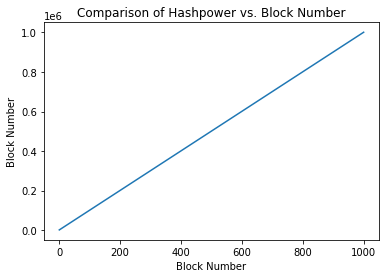

In [2]:
import matplotlib.pyplot as plt

state, params = msi.prepare_state_and_params(state_base, params_base, state_preperation_functions=[vesting_schedule_translate], parameter_preperation_functions=[])
block = list(range(1001))
hashpower = []

for x in block:
    state["Block Number"] = x
    hashpower.append(msi.blocks["Mine Block Boundary Action"](state, params, [])[0]["Aggregate Hashpower"])


plt.plot(block, hashpower)
plt.xlabel("Block Number")
plt.ylabel("Block Number")
plt.title("Comparison of Hashpower vs. Block Number")
plt.show()

In [3]:
msi.blocks["Update Block Difficulty Mechanism"](state, params, [{"Block Difficulty": 7000}])
print(state["Block Difficulty"])

6005.0
